In [1]:
import pandas as pd
import numpy as np

# 10.1 Решающее дерево

Посмотрим, как обучать решающие деревья в python.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Будем предсказывать стоимость домов в Калифорнии.

In [4]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Разобъем данные на тренировочную и тестовые части. Обучим дерево на трейне и оценим качество ($R^2$) на тесте.

In [6]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [7]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [8]:
from sklearn.metrics import r2_score

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.6027349592651801

In [9]:
pred_train = model.predict(Xtrain)

r2_score(ytrain, pred_train)

1.0

Дерево сильно переобучилось!

Попробуем ограничить его по глубине.

2 0.45120526546918793 0.43088594895460397
4 0.5881529015244183 0.5667458138420974
6 0.6735290661749251 0.63493185070596
8 0.7551678130970392 0.6773802622214464
10 0.8322088758923646 0.6844018587904855
12 0.898085527028839 0.6641599480389186
14 0.9446411229582562 0.6313240029264626
16 0.9733697013892558 0.6237773174720853
18 0.9891436686412168 0.600528052513899
20 0.995943271035502 0.6038345121003306
22 0.9985399837449609 0.6075275724264642
24 0.9996017215698247 0.6001040168457068


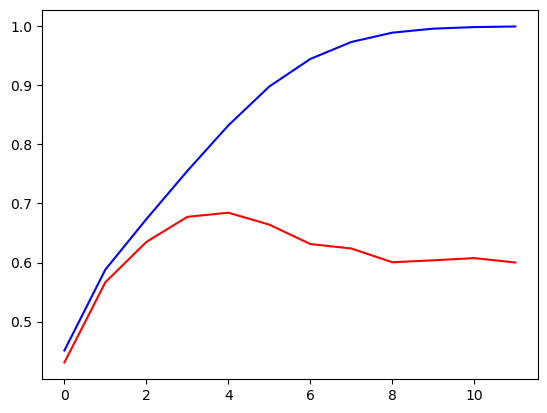

In [10]:
from matplotlib import pyplot as plt

train_scores = []
test_scores = []
depth_range = range(2, 26, 2)
for depth in depth_range:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)

    train_r2 = r2_score(ytrain, pred_train)
    test_r2 = r2_score(ytest, pred_test)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

    print(depth, train_r2, test_r2)

plt.plot(train_scores, color='blue')
plt.plot(test_scores, color='red')
plt.show();

Кросс-валидация

Судя по результатам эксперимента, оптимальная глубина дерева max_depth = 8. Но это мы узнали по конкретному разбиению на train-test.

Чтобы не привязываться к конкретному разбиению, можно посмотреть качество модели по кросс-валидации.

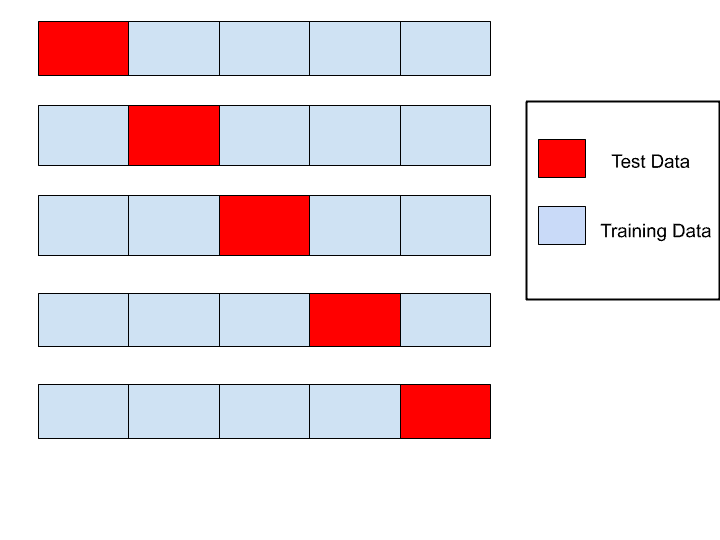

In [11]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(max_depth = 8)

cross_val_score(model, X, y, cv=3, scoring='r2')

array([0.47083564, 0.6047744 , 0.46639267])

In [12]:
cross_val_score(model, X, y, cv=3, scoring='r2').mean()

0.5172296669561539

Решающее дерево можно визуализировать.

Это очень удобно для интерпретации результатов.

In [13]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [14]:
import dtreeviz

viz_model = dtreeviz.model(model, Xtrain, ytrain,
                           feature_names=Xtrain.columns)

viz_model.view(fancy = False, scale = 2)

# 10.2 Обучение решающих деревьев

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier().__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None}

Мы уже решали задачу предсказания стоимости домов при помощи дерева. Тогда удалось добиться качества примерно
$R^2=0.5$ на кросс-валидации.

Немного. Попытаемся улучшить его путём подбора гиперпараметров.

In [16]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [17]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [18]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Подберем гиперпараметры дерева по кросс-валидации по сетке при помощи GridSearchCV.

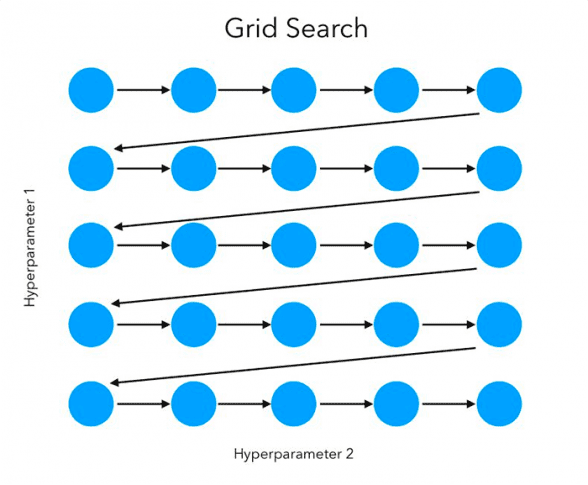

In [19]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params = {'max_depth' : np.arange(2, 6),
          'min_samples_split' : np.arange(2, 9, 2),
          'min_samples_leaf': np.arange(1, 10, 2)}

gs = GridSearchCV(DecisionTreeRegressor(), params, cv=3, scoring='r2', verbose=2)

gs.fit(X, y)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END max_depth=2, min_samples_le

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5]),
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8])},
             scoring='r2', verbose=2)

In [20]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}

In [21]:
gs.best_estimator_, gs.best_score_

(DecisionTreeRegressor(max_depth=5, min_samples_leaf=9), 0.5390892243233139)

Используем прунинг для уменьшения количества вершин в дереве и, следовательно, для снижения переобучения.

Прунинг при обучении дерева использует регуляризованный функционал
$$Q_{\alpha}(T) = Q(T) + \alpha |T|,$$
где $T$ - дерево, $Q(T)$ - функция потерь, $|T|$ - число вершин в дереве.

В sklearn есть Cost-Complexity pruning, который возвращает список возможных порогов $\alpha$ при построении дерева  
(т.к. данных конечное число, то не нужно рассматривать бесконечное число значений).

In [22]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

tree = DecisionTreeRegressor()

path = tree.cost_complexity_pruning_path(Xtrain, ytrain)
alphas = path['ccp_alphas']

alphas

array([0.00000000e+00, 5.73758669e-20, 5.73758669e-20, ...,
       7.95140486e-02, 1.01733053e-01, 4.20802794e-01])

In [23]:
len(alphas)

13916

Чем больше $\alpha$, тем сильнее регуляризация, и тем меньше дерево переобучается.

Посмотрим на зависимость качества предсказания дерева на тренировочных и тестовых данных в зависимости от $\alpha$.

TQDM

Некоторые операции в python выполняются долго.
* Иногда прямо внутри функции есть параметр `verbose`, настроив который, можно узнать сколько уже итераций сделано.
* Если мы хотим посмотреть, как долго будет выполняться цикл, нам поможет библиотека `tqdm`

In [24]:
from tqdm import tqdm

for i in tqdm(range(10000000)):
    pass

100%|██████████| 10000000/10000000 [00:01<00:00, 5544355.73it/s]


In [25]:
import seaborn as sns
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

# cv_score = []

# for i in tqdm(alphas[::100]):
#     tree = DecisionTreeRegressor(ccp_alpha = i)

#     cv = cross_val_score(tree, X, y, cv=3, scoring='r2').mean()
#     cv_score.append(cv)

# 100%|██████████| 140/140 [02:36<00:00,  1.12s/it]

In [26]:
cv_score = [np.float64(0.32083092593953394),
 np.float64(0.33641952134688774), np.float64(0.3169098474989602), np.float64(0.31776092914882303), np.float64(0.3198172682961104), np.float64(0.31822865780645615), np.float64(0.3239139796851915), 
 np.float64(0.3331248163434765), np.float64(0.3251282412854227), np.float64(0.32093785983368356), np.float64(0.3230981976312114),  np.float64(0.3235057208422261), np.float64(0.32187357118939547), 
 np.float64(0.3314893698215105), np.float64(0.3271633962721047), np.float64(0.3234321284764817),  np.float64(0.3250231789581057), np.float64(0.32191290814776563), np.float64(0.3153233878025789), 
 np.float64(0.3147351443670141), np.float64(0.3185787074191734),  np.float64(0.31196457259462856), np.float64(0.32997857854207924), np.float64(0.32207385166796343), np.float64(0.3242834145862483), 
 np.float64(0.3186239811335028),  np.float64(0.330592858621993), np.float64(0.3220852340515448), np.float64(0.3248264348163205), np.float64(0.3214421879650519), np.float64(0.3235124869615678), 
 np.float64(0.3152724814893619), np.float64(0.3224856702771402), np.float64(0.3284698022112416), np.float64(0.3199299639114347), np.float64(0.32935024793541895), np.float64(0.3119035069734155), 
 np.float64(0.323669374077445), np.float64(0.3202161304268837), np.float64(0.32287897331714077), np.float64(0.32370761226848677),  np.float64(0.33122884153280047), np.float64(0.31399876863194126), 
 np.float64(0.32160303561889253), np.float64(0.3222529128286136), np.float64(0.30618713334111197),  np.float64(0.32401243816969794), np.float64(0.33043720978453756), np.float64(0.3318264636910502), 
 np.float64(0.3295452899095502), np.float64(0.31597545629488055),  np.float64(0.31788171049338654), np.float64(0.3268920692741345), np.float64(0.33363474861778303), np.float64(0.327045555085157), 
 np.float64(0.3239223286752782), np.float64(0.32367808490606625), np.float64(0.32326712901150795), np.float64(0.3268474971642094), np.float64(0.33005642498465093), np.float64(0.3157779191283389), 
 np.float64(0.3231227022165212), np.float64(0.3277662323348522), np.float64(0.3253053957679318), np.float64(0.3216295452759759), np.float64(0.3168890932879175), np.float64(0.3234469982127311), 
 np.float64(0.3212122105850582), np.float64(0.3208507837533687), np.float64(0.31759712857816397), np.float64(0.31359380342792514), np.float64(0.32792667216922816), np.float64(0.3250687639429236), 
 np.float64(0.32636924906422526), np.float64(0.32573253710573175), np.float64(0.3255538089740872), np.float64(0.3335975176182107), np.float64(0.31929984122019184), np.float64(0.31657430952041704), 
 np.float64(0.33681983120343556), np.float64(0.3392185961130547), np.float64(0.3266664492696321), np.float64(0.33019165882045415), np.float64(0.31665586600847223), np.float64(0.32969471660172583), 
 np.float64(0.3258797689449762), np.float64(0.31580103938835774), np.float64(0.33958746353734787), np.float64(0.3290158968388355), np.float64(0.3268167699175165), np.float64(0.3243430651283731), 
 np.float64(0.324613533040478), np.float64(0.3388415490024686), np.float64(0.33010207440589323), np.float64(0.32111133234438843), np.float64(0.33748776952420384), np.float64(0.33432343158978967), 
 np.float64(0.3363178672052496), np.float64(0.3348806813540661), np.float64(0.32755540195272587), np.float64(0.3364492593293158), np.float64(0.3312323496485244), np.float64(0.32784183767040537), 
 np.float64(0.3268640925522632), np.float64(0.32556504361472705), np.float64(0.3426673723634714), np.float64(0.32670021942702915), np.float64(0.3261128481029297), np.float64(0.33730811130510013), 
 np.float64(0.33098442489790725), np.float64(0.3405742100038716), np.float64(0.3453361935866522), np.float64(0.34817580508436996), np.float64(0.33898723064244174), np.float64(0.34168719544089443), 
 np.float64(0.34739266506574706), np.float64(0.34106490345056506), np.float64(0.3460948906620079), np.float64(0.3420251685518653), np.float64(0.3571163845402244), np.float64(0.33868916931209014), 
 np.float64(0.3581988838969181), np.float64(0.34988624497473086), np.float64(0.3538046931208126), np.float64(0.35219993243147796), np.float64(0.3599708355849173), np.float64(0.3579582372916778), 
 np.float64(0.36586093473930764), np.float64(0.36855733832825116), np.float64(0.37422519742220556), np.float64(0.3907534570812052), np.float64(0.3967771760095466), np.float64(0.40623828894209596), 
 np.float64(0.4018850335418547), np.float64(0.41715832249466667), np.float64(0.4359037224208156), np.float64(0.4740135400992213), np.float64(0.48005235295971405), np.float64(0.5230714565608096), 
 np.float64(0.5075950724019204)]

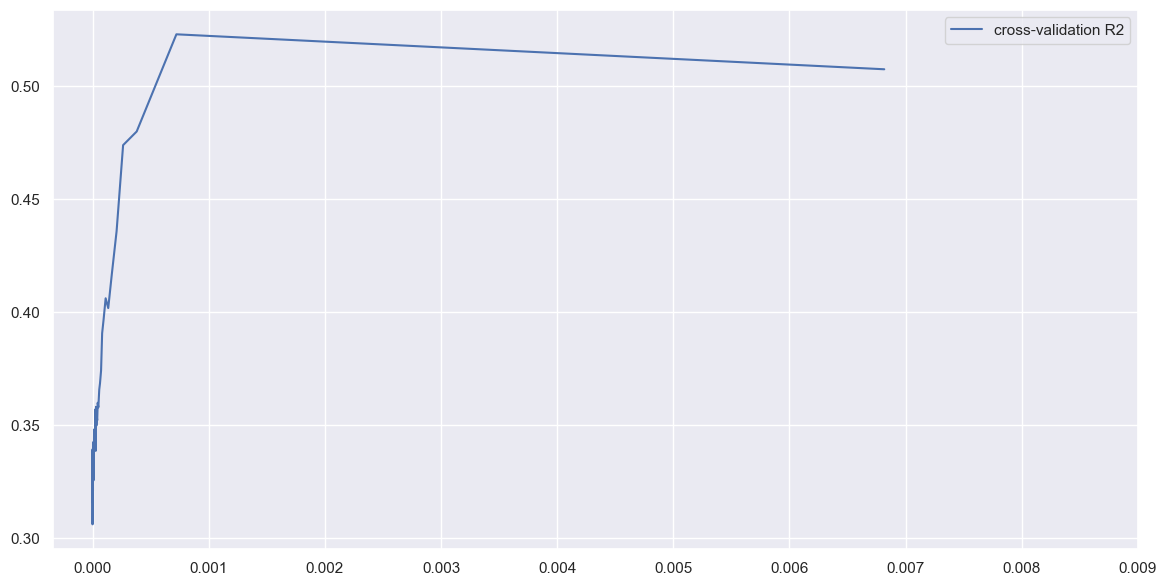

In [27]:
sns.set_theme()
plt.figure(figsize=(14, 7))
sns.lineplot(y = cv_score, x = alphas[::100], label = "cross-validation R2")
plt.xticks(ticks = np.arange(0.00, 0.01, 0.001))
plt.show();

Мы видим, что аккуратный подбор гиперпараметра $\alpha$ при прунинге позволяет улучшить качество модели.

Также можно комбинировать прунинг и подбор других гиперпараметров - это долгая кропотливая работа.

# 10.4  Домашнее задание - 8

В этом задании будем решать задачу классификации клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора (оттоковый клиент) в ближайшее время или нет.

В ноутбуке будем использовать несколько моделей, в том числе SVM, поэтому установим библиотеку для быстрого обучения SVM.

## Импорт библиотек и загрузка данных

In [28]:
# from sklearnex import patch_sklearn
# patch_sklearn()

In [29]:
import sys
import os
import site
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

In [30]:
# зафиксируем константы
RANDOM_STATE = 42

In [31]:
df = pd.read_csv("data/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [32]:
df.shape

(3333, 20)

## Практика

In [33]:
np.random.seed(RANDOM_STATE)

Сделайте первичную обработку данных:

1) Выбросите колонку State

2) Колонки International plan и Voice mail plan закодируйте следующим образом: "Yes" замените на 1, а "No" на 0.

3) Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [34]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [35]:
df = df.drop('State', axis=1)
df.shape

(3333, 19)

In [36]:
# your code here

df[['International plan', 'Voice mail plan']] = df[['International plan', 'Voice mail plan']].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)

### Вопрос

Чему равна сумма значений в закодированном столбце International plan?

In [37]:
# your code here
df['International plan'].sum()

323

Выведите на экран первые строки измененной таблицы, чтобы проверить, что все преобразования сработали.

In [38]:
# your code here
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [39]:
# your code here

X = df.drop('Churn', axis=1)
y = df['Churn']

### Вопрос

Проверьте баланс классов. Является ли выборка сбалансированной?

In [40]:
# your code here

y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

По кросс-валидации с тремя фолдами и метрикой ROC-AUC (scoring='roc_auc') обучите:

1) Логистическую регрессию

2) Метод опорных векторов (с kernel='linear')

Выведите на экран среднее качество моделей на кросс-валидации.

При объявлении SVC не забудьте указать в гиперпараметрах probability = True (так как метод изначально не предсказывает вероятности классов, а они нам нужны для вычисления ROC-AUC).

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
# your code here
# roc_auc_logreg = cross_val_score(LogisticRegression(), X, y, scoring='roc_auc', cv=3)
# roc_auc_svc = cross_val_score(SVC(kernel='linear', probability=True), X, y, scoring='roc_auc', cv=3)

roc_auc_logreg = np.array([0.72953253, 0.71376267, 0.76034652])
roc_auc_svc = np.array([0.78755803, 0.81211507, 0.8152272])

In [42]:
print(roc_auc_logreg)
print(roc_auc_svc)

[0.72953253 0.71376267 0.76034652]
[0.78755803 0.81211507 0.8152272 ]


In [43]:
print(f'Метрика roc_auc для логистической регрессии: {roc_auc_logreg.mean()}')
print(f'Метрика roc_auc для метода опорных векторов: {roc_auc_svc.mean()}')

Метрика roc_auc для логистической регрессии: 0.73454724
Метрика roc_auc для метода опорных векторов: 0.8049667666666668


Теперь обучите решающее дерево с параметрами по умолчанию по кросс-валидации с тремя фолдами и той же метрикой.

ВАЖНО! У решающего дерева для воспроизводимости результатов фиксируйте random_state = RANDOM_STATE

In [44]:
from sklearn.tree import DecisionTreeClassifier

# your code here

roc_auc_tree = cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=3)
roc_auc_tree

array([0.81361556, 0.83961752, 0.83809088])

In [45]:
print(f'Метрика roc_auc для решающего дерева: {roc_auc_tree.mean()}')

Метрика roc_auc для решающего дерева: 0.830441320693037


### Вопрос

Какой из трех алгоритмов показал наилучшее качество на кросс-валидации?

Ваша цель - максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion - "gini" или "entropy".

Для подбора параметров используйте GridSearchCV с тремя фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

При подборе гиперпараметров по кросс-валидации для дальнейшей корректной оценки качества модели нужна отдельная выборка. Давайте сразу действовать правильно:

1) сначала разбиваем (как и раньше) данные на тренировочную и тестовую части
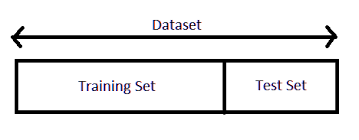

2) затем по тренировочной части при помощи GridSearchCV подбираем оптимальные значения гиперпараметров

3) наконец, делаем предсказание модели с оптимальными гиперпараметрами на тестовых данных и уже по ним оцениваем итоговую метрику.

Сложно, зато правильно!

Первую модель обучим для примера. Дальше вы сами.

In [46]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [47]:
from sklearn.model_selection import GridSearchCV

params = {'C' : np.linspace(0.1, 10.01, 20)}

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

(0.7129531856438551, LogisticRegression(C=1.6647368421052633))

In [48]:
from sklearn.metrics import roc_auc_score

lr = gs.best_estimator_

pred_lr = lr.predict_proba(Xtest)[:,1]
roc_auc_logreg = roc_auc_score(ytest, pred_lr)
print(roc_auc_logreg)

0.7806464247537759


In [49]:
svc = gs.best_estimator_
pred_svc = svc.predict_proba(Xtest)[:,1]
print('svc: ', roc_auc_score(ytest, pred_svc))

svc:  0.7806464247537759


In [50]:
# your code here
### DecisionTreeClassifier #########################################################
# у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion - "gini" или "entropy".

params = {'max_depth': np.arange(1, 10, 1), 'criterion': ['gini', 'entropy']}

gs = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

(0.8644263148363854, DecisionTreeClassifier(max_depth=6, random_state=42))

In [51]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [52]:
ypred = gs.predict_proba(Xtest)[:, 1]
roc_auc_tree = roc_auc_score(ytest, ypred)
round(roc_auc_tree, 2)

0.86

### Вопрос

Чему равно качество решающего дерева с подобранными гиперпараметрами, посчитанное на тестовой выборке?

Ответ округлите до сотых.

Какая модель справилась с решением задачи лучше всего по метрике roc_auc?

Нарисуйте roc-кривую для наилучшей модели.

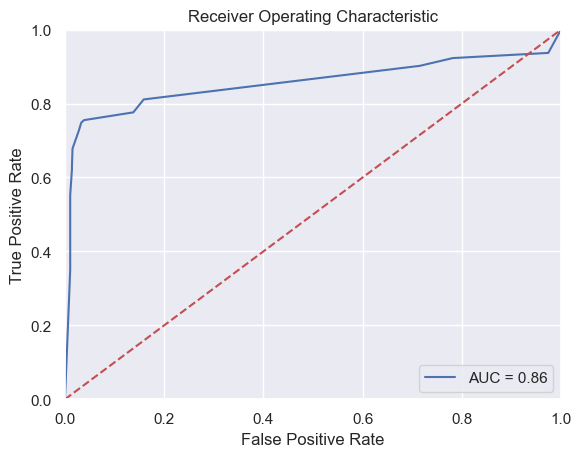

In [53]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

# your code here


fpr, tpr, threshold = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Сравните между собой две лучшие модели.

### Вопрос

Насколько сильно отличается качество предсказания на тестовых данных?
(вычислите разность значений roc-auc)

In [54]:
# your code here

round(roc_auc_tree - roc_auc_logreg, 2)

0.07

Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трех самых важных признаков. Совпадают ли они?

### Вопрос

Какой признак наиболее важен для решающего дерева?

In [55]:
# your code here

tree = gs.best_estimator_

df_tree = pd.DataFrame({'feature': tree.feature_names_in_, 'weights': tree.feature_importances_})
df_tree = df_tree.sort_values('weights', ascending=False).reset_index(drop=True)
df_tree.head()

,feature,weights
0,Total day charge,0.255882
1,Customer service calls,0.148730
2,Total intl calls,0.119125
3,International plan,0.107456
4,Total intl charge,0.077777


In [56]:
df_tree.loc[0:5, 'feature']

0          Total day charge
1    Customer service calls
2          Total intl calls
3        International plan
4         Total intl charge
5         Total eve minutes
Name: feature, dtype: object

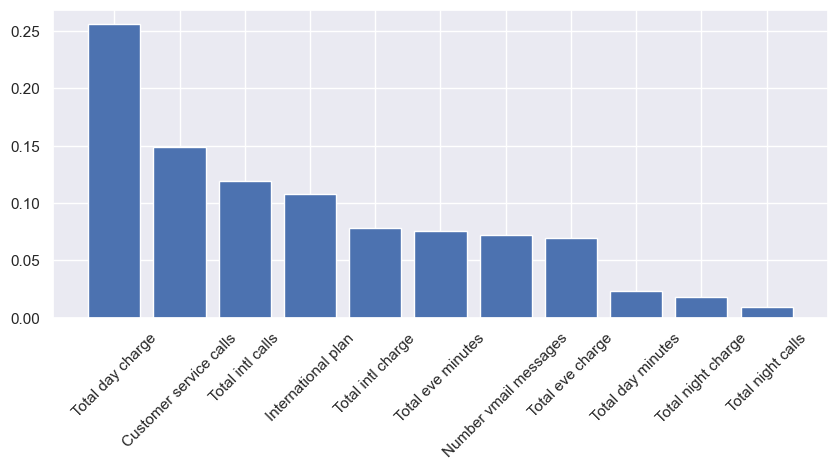

In [57]:
plt.figure(figsize=(10, 4))
plt.bar(df_tree.loc[0:10, 'feature'], df_tree.loc[0:10, 'weights'])
plt.xticks(rotation=45)
plt.show;

Сделайте выводы (для себя)

1) Являются ли данные сбалансированными? Что это означает?

2) Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3) Одинаковые ли признаки важны для работы двух наилучших моделей? Как вы думаете, почему так?

# 11 Композиции решающих деревьев

# 11.1 Разложение ошибки

In [58]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [59]:
RANDOM_STATE = 42

In [60]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_STATE)

In [62]:
scaler = StandardScaler()
scaler.fit(Xtrain)

Xtrain = pd.DataFrame(data = scaler.transform(Xtrain), columns = X.columns)
Xtest = pd.DataFrame(data = scaler.transform(Xtest), columns = X.columns)

## Bias-variance decomposition

В библиотеке `mlxtend` есть функция `bias_variance_decomp` для оценки компонент разложения ошибки.

### Гиперпараметры
* `estimator` - семейство моделей
* `X_train, y_train` - обучающие данные
* `X_test, y_test` - тестовые данные
* `loss` - функция потерь (MSE для регрессии, 0-1 loss (доля ошибок модели) для классификации)
* `num_rounds=200` - число случайных подвыборок из `X_train` для обучения модели

### Возвращаемые значения

* `avg_expected_loss` - ошибка на тестовых данных
* `avg_expected_bias` - смещение
* `avg_expected_variance` - разброс

In [63]:
from mlxtend.evaluate import bias_variance_decomp

X_train = Xtrain.values
y_train = ytrain.values
X_test = Xtest.values
y_test = ytest.values

In [64]:
avg_mse, avg_bias, avg_var = bias_variance_decomp(LinearRegression(), X_train, y_train,
                                                  X_test, y_test, loss = 'mse',
                                                  random_seed=np.random.seed(RANDOM_STATE))

In [65]:
print('Loss:', avg_mse)
print('Bias:', avg_bias)
print('Variance:', avg_var)

Loss: 0.531533122398612
Bias: 0.5291455937849332
Variance: 0.0023875286136787422


In [66]:
# avg_mse, avg_bias, avg_var = bias_variance_decomp(DecisionTreeRegressor(), X_train, y_train,
#                                                   X_test, y_test, loss = 'mse',
#                                                   random_seed=np.random.seed(RANDOM_STATE))

avg_mse = 0.5687605848613759
avg_bias = 0.25371335278884183
avg_var = 0.3150472320725342

In [67]:
print('Loss:', avg_mse)
print('Bias:', avg_bias)
print('Variance:', avg_var)

Loss: 0.5687605848613759
Bias: 0.25371335278884183
Variance: 0.3150472320725342


Мы видим, что решающее дерево гораздо точнее предсказывает целевую переменную, чем линейная регрессия  
(*bias* гораздо меньше), но при этом гораздо сильнее переобучено (*variance* гораздо больше).  
За счет этого суммарная ошибка у дерева чуть больше, чем у линейной регрессии.

Путем подбора гиперпараметров дерева можно снизить переобучение и суммарную ошибку.

# 11.2 Бэггинг. Случайный лес

# Случайный лес (Random Forest)

В программе:
* обучение леса и сравнение с деревом
* подбор гиперпараметров леса
* зависимость качества от числа деревьев

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import fetch_california_housing

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [69]:
RANDOM_STATE = 42

In [70]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

## 1. Сравнение дерева и леса

In [71]:
dt = DecisionTreeRegressor()

cross_val_score(dt, X, y, cv=3, scoring='r2').mean()

0.3178492042718299

In [72]:
rf = RandomForestRegressor()

# cv_score = cross_val_score(rf, X, y, cv=3, scoring='r2').mean()
cv_score = 0.6542839674831823

## 2. Подбор гиперпараметров леса

Для подбора гиперпараметров модели лучше всего действовать так:
* разбиваем данные на *train* и *test*
* на *train* по кросс-валидации при помощи `GridSearchCV` ищем наилучшие гиперпараметры модели
* оцениваем качество модели с наилучшими гиперпараметрами на *test*

In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

### Гиперпараметры леса (random forest)

* `n_estimators=100` - число деревьев в лесе
* `oob_score=False` - вычисляем ли out-of-bag ошибку
* `n_jobs=None` - на сколько процессов распараллеливаем вычисления
* гиперпараметры деревьев (обсуждали раньше):
  + `criterion='squared_error'`
  + `max_depth=None`
  + `min_samples_split=2`
  + ...
  + `random_state=None`


In [74]:
params = {'n_estimators': np.arange(10, 200, 20),
          'max_depth': np.arange(2, 20, 3)}

gs = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='r2', verbose=2)

# gs.fit(Xtrain, ytrain)

gs.best_estimator_ = RandomForestRegressor(max_depth=17, n_estimators=150)
gs.best_score_ = 0.7933739211784913

In [75]:
gs.best_score_, gs.best_estimator_

(0.7933739211784913, RandomForestRegressor(max_depth=17, n_estimators=150))

In [76]:
params = {'max_features': [None, 'sqrt', 'log2']}

gs = GridSearchCV(RandomForestRegressor(n_estimators = 150, max_depth = 17), params, cv=3, scoring='r2', verbose=2)

# gs.fit(Xtrain, ytrain)

gs.best_estimator_ = RandomForestRegressor(max_depth=17, max_features='log2', n_estimators=150)
gs.best_score_ = 0.8063719536830251

In [77]:
gs.best_score_, gs.best_estimator_

(0.8063719536830251,
 RandomForestRegressor(max_depth=17, max_features='log2', n_estimators=150))

Теперь проверим полученную модель на тестовых данных

In [78]:
model = RandomForestRegressor(n_estimators = 190, max_depth = 17, max_features='log2')

model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.8134855325775389

## 3. Поведение модели при увеличении числа деревьев

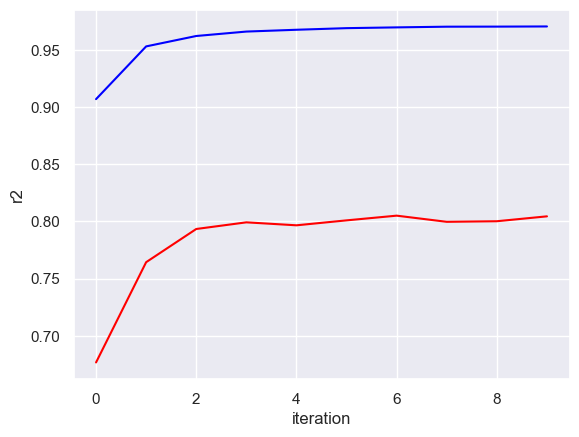

In [79]:
r2_train = []
r2_test = []

for n in range(2, 50, 5):
    model = RandomForestRegressor(n_estimators = n, n_jobs=-1)
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)

    r2_train.append(r2_score(ytrain, pred_train))
    r2_test.append(r2_score(ytest, pred_test))

plt.plot(r2_train, color='blue')
plt.plot(r2_test, color='red')
plt.xlabel('iteration')
plt.ylabel('r2')
plt.show();

Эти графики подтверждают теорию: при увеличении числа деревьев в лесе качество тоже только увеличивается.

На практике качество в какой-то момент выходит на асимптоту и начинает увеличиваться совсем незначительно. Поэтому обычно выбирают минимальное число деревьев в лесе, при котором качество уже почти не растет - ведь лес с большим числом деревьев обучается очень долго.

# 11.3 Бустинг. Градиентный бустинг над решающими деревьями

# Градиентный бустинг (Gradient Boosting)

В программе:
* обучение бустинга и сравнение с лесом
* подбор гиперпараметров бустинга
* зависимость качества от числа деревьев

In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import fetch_california_housing

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score

In [81]:
RANDOM_STATE = 42

In [82]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

## 1. Сравнение дерева и леса

In [83]:
rf = RandomForestRegressor()

# cv_score = cross_val_score(rf, X, y, cv=3, scoring='r2').mean()
cv_score = 0.6548439152190694
cv_score

0.6548439152190694

In [84]:
gb = GradientBoostingRegressor()

cross_val_score(gb, X, y, cv=3, scoring='r2').mean()

0.6800558908038473

## 2. Подбор гиперпараметров бустинга

Напомним, как мы действуем при подборе гиперпараметров:
* разбиваем данные на *train* и *test*
* на *train* по кросс-валидации при помощи `GridSearchCV` ищем наилучшие гиперпараметры модели
* оцениваем качество модели с наилучшими гиперпараметрами на *test*

In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

### Гиперпараметры бустинга (gradient boosting)

* `n_estimators=100` - число деревьев в лесе
* `learning_rate=0.1` - градиентный шаг (= степень доверия каждой модели в композиции)
* гиперпараметры деревьев (обсуждали раньше):
  * `criterion='squared_error'`
  * `max_depth=None`
  * `min_samples_split=2`
  * ...
  * `random_state=None`


In [86]:
params = {'n_estimators': np.arange(10, 200, 20),
          'max_depth': np.arange(2, 20, 3)}

gs = GridSearchCV(GradientBoostingRegressor(), params, cv=3, scoring='r2', verbose=2)

# gs.fit(Xtrain, ytrain)

gs.best_score_ = 0.8244124183295582
gs.best_estimator_ = GradientBoostingRegressor(n_estimators=170, max_depth=8)

In [87]:
gs.best_score_, gs.best_estimator_

(0.8244124183295582, GradientBoostingRegressor(max_depth=8, n_estimators=170))

In [88]:
params = {'max_features': [None, 'sqrt', 'log2']}

gs = GridSearchCV(GradientBoostingRegressor(n_estimators = 170, max_depth = 8), params, cv=3, scoring='r2', verbose=2)

# gs.fit(Xtrain, ytrain)

gs.best_score_ = 0.8296675722761929
gs.best_estimator_ = GradientBoostingRegressor(max_depth=8, max_features='log2', n_estimators=170)

In [89]:
gs.best_score_, gs.best_estimator_

(0.8296675722761929,
 GradientBoostingRegressor(max_depth=8, max_features='log2', n_estimators=170))

Теперь проверим полученную модель на тестовых данных

In [90]:
model = GradientBoostingRegressor(n_estimators = 170, learning_rate = 0.1, max_depth = 8, max_features='log2')

model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.8413603343861233

На качество бустинга влияет `learning_rate`.

Стратегия такая: после подбора гиперпараметров мы уменьшаем `learning_rate` до 0.01-0.03  
(то есть если значение по умолчанию 0.1, то уменьшаем в 10 раз), и во столько же раз увеличиваем число деревьев.

In [91]:
model = GradientBoostingRegressor(n_estimators = 1700, learning_rate = 0.01, max_depth = 8, max_features='log2')

# model.fit(Xtrain, ytrain)

# pred = model.predict(Xtest)

# gb_r2_score = r2_score(ytest, pred)

gb_r2_score = 0.8513305213448346
gb_r2_score

0.8513305213448346

При помощи случайного леса в предыдущем уроке нам удалось добиться качества $r2=0.812$.

Мы видим, что в этой задаче бустинг значительно превзошел по качеству алгоритм случайного леса!

## 3. Поведение модели при увеличении числа деревьев

Text(0, 0.5, 'r2')

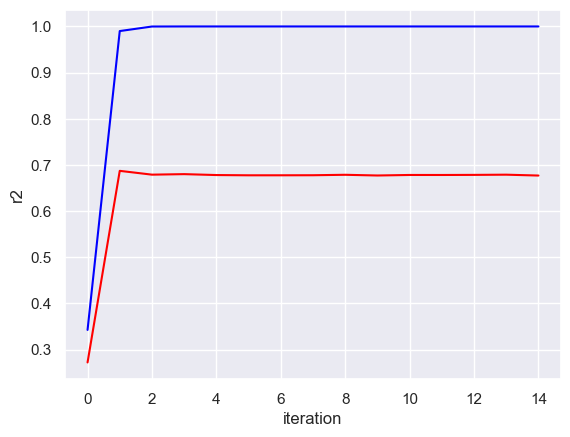

In [92]:
r2_train = []
r2_test = []

# for n in range(2, 300, 20):
#     model = GradientBoostingRegressor(n_estimators = n, max_depth = 20)
#     model.fit(Xtrain, ytrain)

#     pred_train = model.predict(Xtrain)
#     pred_test = model.predict(Xtest)

#     r2_train.append(r2_score(ytrain, pred_train))
#     r2_test.append(r2_score(ytest, pred_test))

r2_train = [0.3427123199375526, 0.9900135328256036, 0.9998448350203526, 0.9999975231982264, 0.9999999590384006, 0.9999999992945161, 0.9999999999869645, 0.9999999999997358, 0.9999999999999875, 0.9999999999999997, 0.9999999999999998, 0.9999999999999998, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999]
r2_test = [0.27225990223772145, 0.6872497052788509, 0.6789980210566462, 0.6801211584780154, 0.67815375843895, 0.6776041075256625, 0.677629897649626, 0.6777529429152422, 0.6787138686722095, 0.6771840296443707, 0.6783243278780935, 0.6782931758240561, 0.6785077817305144, 0.6789472437906519, 0.6770676345650275]

plt.plot(r2_train, color='blue')
plt.plot(r2_test, color='red')
plt.xlabel('iteration')
plt.ylabel('r2')

# 11.4  Домашнее задание - 9 Прогнозируем задержки самолётов


В этом домашнем задании вы будете работать с задачей про задержки самолётов.  На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.

## Импорт библиотек, установка констант

In [225]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import roc_auc_score

In [226]:
RANDOM_STATE = 111
DATASET_PATH = 'data/flight_delays_train.csv'

## Загрузка и обзор данных

In [227]:
data = pd.read_csv(DATASET_PATH)

In [228]:
data.sample(5)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
21418,c-3,c-15,c-3,1611,YV,PHX,SNA,338,N
71870,c-5,c-12,c-4,807,WN,SNA,SJC,342,N
98098,c-8,c-30,c-3,1132,UA,HNL,SFO,2398,N
82347,c-7,c-26,c-3,1041,NW,DTW,BNA,457,N
145,c-6,c-26,c-7,1440,WN,MAF,DAL,319,N


## Вопрос для Quiz

Сколько числовых столбцов в данных?

In [229]:
numeric_columns = data.select_dtypes(include='number')
print(len(numeric_columns.columns))

data.select_dtypes([float, int]).head()

2


,DepTime,Distance
0,1934,732
1,1548,834
2,1422,416
3,1015,872
4,1828,423


## Обучение моделей

Разбейте данные
* на матрицу объект признак `X`, содержащую только числовые столбцы `DepTime`, `Distance`
* вектор с целевой переменной `y`, равный столбцу `dep_delayed_15min`, переведенном в 0 и 1 по правилу: 'Y' - 1, 'N' - 0.

In [230]:
# your code here
X = data[numeric_columns.columns]
y = data['dep_delayed_15min'].map({'Y': 1, 'N': 0})

Обучите по кросс-валидации с тремя фолдами и метрикой *ROC-AUC* (`scoring='roc_auc'`) три модели с гиперпараметрами по умолчанию:
* решающее дерево
* случайный лес
* градиентный бустинг

Выведите на экран среднее качество по кросс-валидации каждой из моделей.

In [231]:
# your code here

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
rf = RandomForestClassifier(random_state=RANDOM_STATE)
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
print('Decision Tree:', cross_val_score(dt, X, y, cv=3, scoring='roc_auc').mean())
print('Random Forest:', cross_val_score(rf, X, y, cv=3, scoring='roc_auc').mean())
print('Gradient Boosting:', cross_val_score(gb, X, y, cv=3, scoring='roc_auc').mean())

Decision Tree: 0.5792982351791407
Random Forest: 0.6758129274941099
Gradient Boosting: 0.6992516986788738


## Вопрос для Quiz

какой алгоритм показал наилучшее качество?

Выведите *bias* и *variance* каждой из моделей при помощи `bias_variance_decomp` из библиотеки `mlxtend`. Функция на вход ожидает получения тренировочных и тестовых данных, поэтому разобъем все данные на train и test.

Для ускорения вычислений
* возьмите только первые 1000 строк из тренировочных данных (`Xtrain[:1000], ytrain[:1000]`)
* поставьте `num_rounds = 50` в функции `bias_variance_decomp`

И не забудьте перевести `pd.dataframe` в `np.array` - так как библиотека умеет работать только с этим типом данных (`Xtrain.values` и так для всех объектов).

In [232]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [233]:
from mlxtend.evaluate import bias_variance_decomp

# your code here

X_train = Xtrain[:1000].values
y_train = ytrain[:1000].values
X_test = Xtest.values
y_test = ytest.values

In [234]:
for model in [dt, rf, gb]:

    avg_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train, y_train,
                                                    X_test, y_test, loss = '0-1_loss', 
                                                    num_rounds=50,
                                                    random_seed=np.random.seed(RANDOM_STATE))
    print(str(type(model)).split('.')[-1].strip("'>"))
    print('Loss: %.3f' % avg_loss)
    print('Bias: %.3f' % avg_bias)
    print('Variance: %.3f' % avg_var)
    print()

DecisionTreeClassifier
Loss: 0.299
Bias: 0.247
Variance: 0.174

RandomForestClassifier
Loss: 0.246
Bias: 0.229
Variance: 0.088

GradientBoostingClassifier
Loss: 0.217
Bias: 0.199
Variance: 0.064



## Вопрос для Quiz

какой алгоритм с гиперпараметрами по умолчанию имеет наименьшее смещение?

In [235]:
# GradientBoostingClassifier

## Подбор гиперпараметров

Напомним, как мы действуем при подборе гиперпараметров:
* разбиваем данные на *train* и *test*
* на train по кросс-валидации при помощи `GridSearchCV` ищем наилучшие гиперпараметры модели
* оцениваем качество модели с наилучшими гиперпараметрами на *test*

Будем использовать 3 фолда при кросс-валидации, а метрику - *ROC-AUC* (`scoring='roc_auc'`).


Далее везде можно обучать модель на первых 10000 строк из обучающей выборки (так как всего два признака).

### 1. Подберите гиперпараметры для решающего дерева:
* `max_depth` (обязательно)
* `max_features` (обязательно)
* `criterion` (по желанию)
* `min_samples_split` (по желанию)
* `min_samples_leaf` (по желанию)

Диапазоны поиска гиперпараметров выбирайте самостоятельно.

Добейтесь качества *ROC-AUC* $>0.65$ на кросс-валидации.

In [236]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [237]:
model_dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
params = {'max_depth': np.arange(1, 10, 1),
          'max_features': np.arange(1, 2, 1),
          'criterion':['gini', 'entropy', 'log_loss']
         }

gs = GridSearchCV(model_dtc, params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
gs.fit(X_train[:10000], y_train[:10000])

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([1])},
             scoring='roc_auc', verbose=1)

In [238]:
result_model = pd.DataFrame(columns=['Model', 'roc_auc'])

Теперь обучите на **всех** тренировочных данных решающее дерево с лучшими  
найденными гиперпараметрами и выведите *ROC-AUC* на тесте.

In [239]:
# your code here
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)

In [240]:
result_model.loc[len(result_model.index)]=['DecisionTreeClassifier', roc_auc]

### 2. Подберите гиперпараметры для случайного леса:
* `n_estimators` (обязательно)
* `max_depth` (обязательно)
* `max_features` (по желанию)
* `criterion` (по желанию)
* `min_samples_split` (по желанию)
* `min_samples_leaf` (по желанию)

Диапазоны поиска гиперпараметров выбирайте самостоятельно.

Добейтесь качества *ROC-AUC* $>0.65$ на кросс-валидации.

In [241]:
# your code here
model_rfr = RandomForestClassifier(random_state=RANDOM_STATE)
params = {'n_estimators': np.arange(100, 150, 1),
          'max_depth': np.arange(2, 10, 1)
         }

gs = GridSearchCV(model_rfr, params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
gs.fit(X_train[:10000], y_train[:10000])

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])},
             scoring='roc_auc', verbose=1)

Теперь обучите на **всех** тренировочных данных случайный лес с лучшими  
найденными гиперпараметрами и выведите *ROC-AUC* на тесте.

In [242]:
# your code here
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)

In [243]:
result_model.loc[len(result_model.index)] = ['RandomForestClassifier', roc_auc]

### 3. Подберите гиперпараметры для градиентного бустинга:
* `n_estimators` (обязательно)
* `max_depth` (обязательно)
* `max_features` (по желанию)
* `criterion` (по желанию)
* `min_samples_split` (по желанию)
* `min_samples_leaf` (по желанию)

Диапазоны поиска гиперпараметров выбирайте самостоятельно.

Добейтесь качества *ROC-AUC* $>0.65$ на кросс-валидации.

In [244]:
# your code here
model_gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)
params = {'n_estimators': np.arange(100, 150, 1),
          'max_depth': np.arange(2, 10, 1)
         }

gs = GridSearchCV(model_gbc, params, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
gs.fit(X_train[:10000], y_train[:10000])

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])},
             scoring='roc_auc', verbose=2)

Теперь обучите на **всех** тренировочных данных градиентный бустинг с лучшими  
найденными гиперпараметрами и выведите *ROC-AUC* на тесте.

In [245]:
# your code here
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)

In [246]:
result_model.loc[len(result_model.index)] = ['GradientBoostingClassifier', roc_auc]

In [247]:
result_model

,Model,roc_auc
0,DecisionTreeClassifier,0.684699
1,RandomForestClassifier,0.703278
2,GradientBoostingClassifier,0.702814


Теперь поставьте `learning_rate = 0.01` (в десять раз меньше, чем по умолчанию) и увеличьте найденное число деревьев в 10 раз.

С этими изменениями обучите бустинг на трейне и выведите качество на тесте.

In [248]:
learning_rate = 0.01
n_estimators = 118 * 10
model_gbc_1 = GradientBoostingClassifier(max_depth=2, n_estimators=n_estimators, learning_rate=learning_rate, random_state=111)
model_gbc_1.fit(X_train, y_train)
pred = model_gbc_1.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred)

result_model.loc[len(result_model.index)] = ['GradientBoostingClassifier-1', roc_auc]

In [249]:
result_model

,Model,roc_auc
0,DecisionTreeClassifier,0.684699
1,RandomForestClassifier,0.703278
2,GradientBoostingClassifier,0.702814
3,GradientBoostingClassifier-1,0.702814


## Вопрос для Quiz

Есть ли алгоритм, который на тестовых данных показывает качество, значительно превышающее результаты других алгоритмов? (более чем на 0.1 десятую)

## Вопрос для Quiz

Чему равно качество на тестовых данных у наилучшей модели? Ответ округлите до десятых.

## Размышления

Мы использовали для обучения очень много объектов и очень мало признаков, поэтому ансамбли моделей не смогли себя показать в полную мощь. Если задействовать больше характеристик полета, то и качество моделей может стать выше.

# Улучшение модели

Мы выкинули очень много колонок из начальной таблицы, но, возможно, они полезны для наших моделей.

Попробуем улучшить модель, использовав другие признаки.

In [250]:
data['dep_delayed_15min'] = data['dep_delayed_15min'].map({'Y' : 1, 'N' : 0})

Обработаем колонку месяц, оставив в ней только число - номер месяца.

Посмотрим на среднее количество задержек в каждом месяце.

In [251]:
data['Month'] = data['Month'].apply(lambda x: int(x.split('-')[1]))

print('average:', data['dep_delayed_15min'].mean())

data.groupby('Month')['dep_delayed_15min'].mean()

average: 0.19044


Month
1     0.190588
2     0.177406
3     0.194997
4     0.155328
5     0.153693
6     0.221892
7     0.238112
8     0.201925
9     0.156683
10    0.178584
11    0.170824
12    0.241258
Name: dep_delayed_15min, dtype: float64

Мы видим, что в некоторые месяцы (7 и 12) задержек довольно много, а в какие-то месяцы наоборот меньше. Так что признак может пригодиться!

В данных также есть интересный признак `UniqueCarrier` - это код авиакомпании-перевозчика.

Давайте посмотрим, связаны ли как-то задержки самолетов с авиакомпанией. Для этого выведем среднее число задержек и количество рейсов по каждой авиакомпании.

In [252]:
print('average:', data['dep_delayed_15min'].mean())

data.groupby('UniqueCarrier').agg({"dep_delayed_15min": ["mean", "count"]})

average: 0.19044


dep_delayed_15min       
                           mean  count
UniqueCarrier                         
AA                     0.187938   9418
AQ                     0.076923    234
AS                     0.243474   2222
B6                     0.213819   1838
CO                     0.181818   4334
DH                     0.161491    966
DL                     0.168922   8128
EV                     0.275318   3930
F9                     0.155070   1006
FL                     0.242185   3039
HA                     0.043307    762
HP                     0.142235   1378
MQ                     0.194545   7443
NW                     0.167890   6403
OH                     0.175882   4594
OO                     0.172801   7390
TZ                     0.143498    446
UA                     0.192263   6876
US                     0.167387   6482
WN                     0.213433  15082
XE                     0.173869   5901
YV                     0.224624   2128

Мы видим, что некоторые перевозчики довольно часто задерживают рейсы, а некоторые почти не задерживают. То есть знание об авиакомпании важно!


Код авиакомпании - это категориальный признак. В начале курса мы немного говорили про то, как можно кодировать такие признаки - вот [ссылка на соответствующий урок](https://stepik.org/lesson/806464/step/4?unit=809640).

Подход называется OneHot encoding. Напомним, в чем он состоит:
* мы создаем столько же колонок, сколько различных категорий в столбце
* далее для объекта ставим 1 в ту колонку, к категории которой он относится, а во все остальные колонки ставим 0

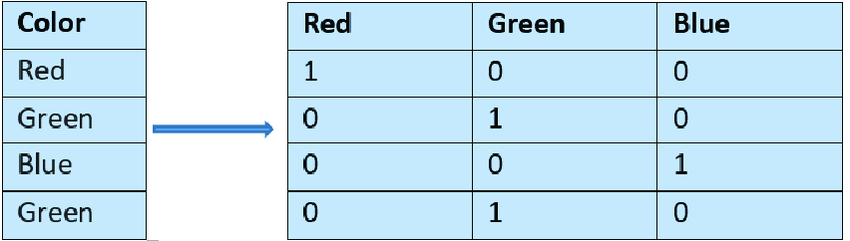

Заметим, что сумма значений в каждой строке равна 1 - то есть получили линейно-зависимые столбцы. Поэтому на практике создают на 1 колонку меньше, чем планировалось, чтобы избежать линейной зависимости.

Закодируем столбец `UniqueCarrier` при помощи OneHot encoding. В pandas этот метод называется get_dummies.

In [253]:
X = data[['Month','UniqueCarrier','DepTime','Distance']]
y = data['dep_delayed_15min']

X = pd.get_dummies(X, columns=['UniqueCarrier'], drop_first=True) # drop_first=True - выкидываем один столбец, чтобы избежать линейной зависимости
X.head()

,Month,DepTime,Distance,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DH,UniqueCarrier_DL,UniqueCarrier_EV,...,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_TZ,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,8,1934,732,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4,1548,834,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,9,1422,416,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11,1015,872,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,10,1828,423,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [254]:
print('Decision Tree:', cross_val_score(DecisionTreeClassifier(), X, y, cv=3, scoring='roc_auc').mean())
print('Random Forest:', cross_val_score(RandomForestClassifier(), X, y, cv=3, scoring='roc_auc').mean())
print('Gradient Boosting:', cross_val_score(GradientBoostingClassifier(), X, y, cv=3, scoring='roc_auc').mean())

Decision Tree: 0.5813778093648567
Random Forest: 0.6952179216088199
Gradient Boosting: 0.7129765912830512


Базовые модели показывают результаты по кросс-валидации чуть лучше! Ура!

Теперь вам необходимо подобрать оптимальные гиперпараметры модели так же, как вы делали в заданиях выше.

Так как информации о каждой авиакомпании не так много, то здесь для обучения лучше использовать все тренировочные данные, а не только первые 10000 строк.

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

### Подберите оптимальные гиперпараметры для Decision Tree.

In [256]:
# your code here
model_dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
params = {'max_depth': np.arange(1, 10, 1),
          'max_features': np.arange(1, 2, 1),
          'criterion':['gini', 'entropy', 'log_loss']
         }

gs = GridSearchCV(model_dtc, params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([1])},
             scoring='roc_auc', verbose=1)

In [257]:
result_model = pd.DataFrame(columns=['Model', 'roc_auc'])

Теперь обучите на **всех** тренировочных данных случайный лес с лучшими  
найденными гиперпараметрами и выведите *ROC-AUC* на тесте.

In [258]:
# your code here
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)

### Подберите оптимальные гиперпараметры для Random Forest.

In [ ]:
# your code here
model_rfr = RandomForestClassifier(random_state=RANDOM_STATE)
params = {'n_estimators': np.arange(140, 150, 1),
          'max_depth': np.arange(5, 10, 1)
         }

gs = GridSearchCV(model_rfr, params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])},
             scoring='roc_auc', verbose=1)

Теперь обучите на **всех** тренировочных данных случайный лес с лучшими  
найденными гиперпараметрами и выведите *ROC-AUC* на тесте.

In [260]:
# your code here
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)

In [261]:
result_model.loc[len(result_model.index)] = ['RandomForestClassifier', roc_auc]

### Подберите оптимальные гиперпараметры для Random Forest.

Чтобы сверить часы с составителями задания, подберите оптимальные гиперпараметры бустинга:
* задайте n_estimators = 70
* ищите max_depth в диапазоне от 10 до 20 не включительно с шагом 3

In [262]:
# your code here
model_gbc = GradientBoostingClassifier(random_state=RANDOM_STATE)
params = {'n_estimators': [70],
          'max_depth': np.arange(10, 20, 3)
         }

gs = GridSearchCV(model_gbc, params, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=111),
             n_jobs=-1,
             param_grid={'max_depth': array([10, 13, 16, 19]),
                         'n_estimators': [70]},
             scoring='roc_auc', verbose=2)

Теперь обучите на **всех** тренировочных данных градиентный бустинг с лучшими  
найденными гиперпараметрами и выведите *ROC-AUC* на тесте.

In [263]:
# your code here
best_estimator = gs.best_estimator_
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)

In [264]:
result_model.loc[len(result_model.index)] = ['GradientBoostingClassifier', roc_auc]

In [265]:
result_model

,Model,roc_auc
0,RandomForestClassifier,0.714541
1,GradientBoostingClassifier,0.724489


## Вопрос для Quiz

Чему равно качество модели с наилучшими параметрами, обученной на всех тренировочных данных и примененной к тесту?

Ответ округлите до десятых.

Посмотрим на важность признаков у полученного бустинга.

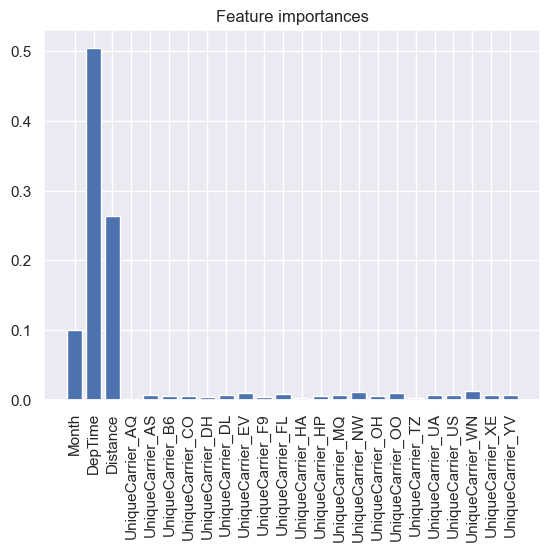

In [266]:
# в коде model - это модель (если назвали по-другому, то в этом кусочке измените model на свое название)
model = best_estimator
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(range(len(model.feature_importances_)), X.columns, rotation='vertical')
plt.show();

## Вопрос для Quiz

Какой признак оказался самым важным для градиентного бустинга?

# Бонус

Мы вcе еще не используем очень много колонок из таблицы.

Попробуйте преобразовать какие-нибудь из оставшихся колонок в числовые признаки и с их добавлением в данные обучить модели.

Попытайтесь добиться как можно более высокого качества. Любые эксперименты приветствуются!

In [267]:
# your code here

Эти графики подтверждают теорию: при увеличении числа деревьев в бустинге качество на тренировочных данных сначала растет, а потом начинает уменьшаться (так как начинается переобучение).

Поэтому на практике необходимо подобрать такое число деревьев, при котором качество на тестовых данных максимальное (и больше деревьев не брать!). В этом одно из важных отличий бустинга от леса.